Let's first setup our imports

In [2]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from sklearn import datasets
import seaborn as sns

In [3]:
% matplotlib inline

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [4]:
iris = sns.load_dataset("iris")

Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
x = iris.drop('species', axis=1)
y = iris.species

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

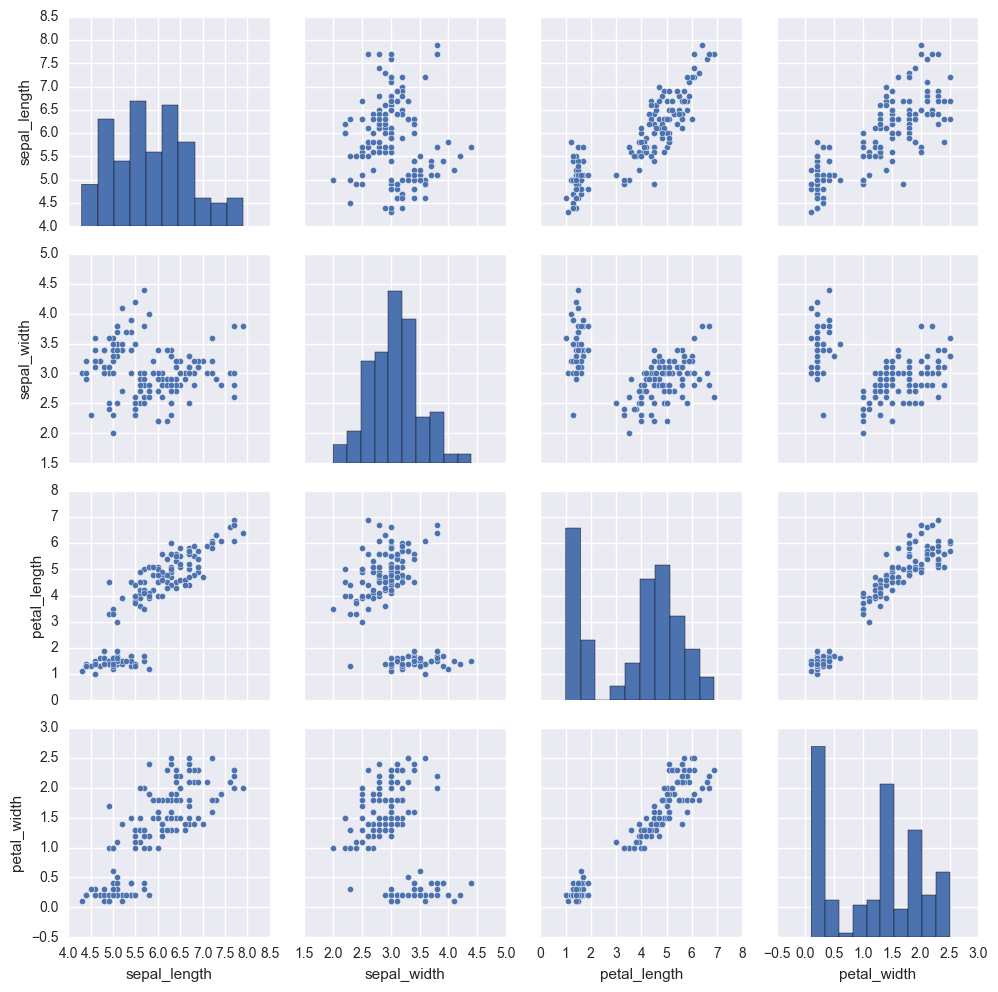

In [7]:
sns.pairplot(x)

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [8]:
from sklearn.cluster import KMeans

In [26]:
from sklearn.preprocessing import normalize

nx = normalize(x)

s_kmeans = KMeans(n_clusters = 3, random_state=26)

s_kmeans.fit(nx)

scaled_labels = s_kmeans.labels_

In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nx, scaled_labels, random_state = 4, test_size = 0.5)

kmeans = KMeans(n_clusters=3,random_state = 26)

# Fit our Model
kmeans.fit(X_train)

# Labels are the cluster names/numbers/labels.
labels = kmeans.labels_

# Return the Cluster Labels that the K-Means model created.
print labels

[0 2 0 0 1 0 2 0 1 0 2 0 2 0 2 0 0 2 2 0 2 2 1 0 1 2 1 2 2 2 2 1 0 0 2 2 2
 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 2 1 1 0 2 0 1 1 0 2 2 2 0 0 2 0 2 2 0 0
 0]


Compute the labels and centroids

In [28]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.70579788,  0.32875175,  0.58719733,  0.21633513],
       [ 0.79753309,  0.55436166,  0.23057212,  0.03865883],
       [ 0.75598376,  0.3473325 ,  0.52926744,  0.1609058 ]])

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

('For n_clusters =', 3, 'The average silhouette_score is :', 0.57632647682228244)


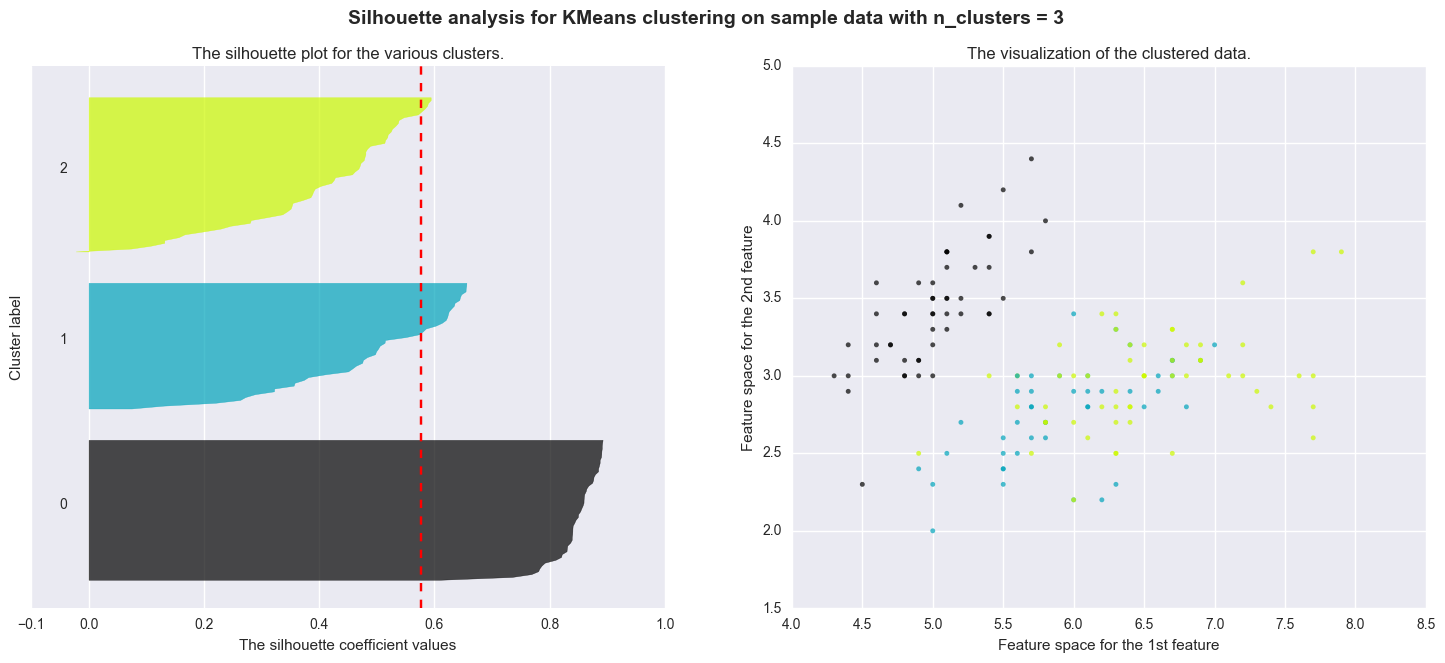

In [30]:
range_n_clusters = [3]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(nx) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(nx)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(nx, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(nx, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x['sepal_length'], x['sepal_width'], marker='.', s=50, lw=0, alpha=0.7,
                c=colors)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Plot the predicted vs actual classifcations to see how our clustering analysis compares

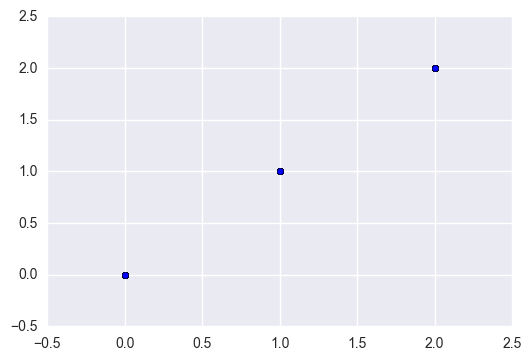

In [40]:
plt.scatter(pred_y, y_test)

Check the centroids to see where each cluster is lying 

In [32]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.70579788,  0.32875175,  0.58719733,  0.21633513],
       [ 0.79753309,  0.55436166,  0.23057212,  0.03865883],
       [ 0.75598376,  0.3473325 ,  0.52926744,  0.1609058 ]])

Check the labels of the clusters

In [33]:
labels = kmeans.labels_
labels

array([0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1,
       0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 0], dtype=int32)

Compute the accuracy score using scikit to see how accurate our analysis is

In [34]:
pred_y = kmeans.predict(X_test)
metrics.accuracy_score(y_test, pred_y)

1.0

Compute the silhoutte coefficient to see how consistent our data is within the clusters

In [35]:
print silhouette_score(X_test, y_test ,metric='euclidean')

print silhouette_score(X_test, pred_y ,metric='euclidean')


0.602221934643
0.602221934643


Calculate the Precision, Recall, and F - Score to see the test's accuracy

In [36]:
print metrics.classification_report(y_test, pred_y)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        25
          1       1.00      1.00      1.00        30
          2       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00        75



Compute the Confusion Matrix to test the performance of the clustering analysis

In [37]:
print(metrics.confusion_matrix(y_test, pred_y))


[[25  0  0]
 [ 0 30  0]
 [ 0  0 20]]


Compute homogeneity, completeness and v_measure test.

In [38]:
from sklearn.metrics import homogeneity_completeness_v_measure
print homogeneity_completeness_v_measure(y_test,pred_y)

(1.0, 1.0, 1.0)
